# Bollig 2016 Models

Data from Mirizzi et al., particular the models that go into Figure 17. Models (s11.2c and s27.0c) taken from the Garching Supernova archive (https://wwwmpa.mpa-garching.mpg.de/ccsnarchive/data/Bollig2016/) with permission for use in SNEWS2.0.

Reference: Mirizzi et al. Rivista del Nuovo Cimento Vol 39 N. 1-2 (2016)
- doi:10.1393/ncr/i2016-10120-8
- arXiv:1508.00785

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models import Bollig_2016
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

/path/to/snewpy/python/snewpy/models/__init__.py:7: FutureWarning: snewpy.models.Bollig_2016 is moved to snewpy.models.ccsn.Bollig_2016
  warn(f"{__name__}.{name} is moved to {__name__}.ccsn.{name}", FutureWarning)


In [2]:
mpl.rc('font', size=16)

In [3]:
def plot_luminosity(model):
    fig, ax = plt.subplots(1, figsize=(8,6))
    for flavor in Flavor:

        ax.plot(model.time, model.luminosity[flavor]/1e51, # Report luminosity in units foe/s
                label=flavor.to_tex(),
                color = 'C0' if flavor.is_electron else 'C1',
                ls = '-' if flavor.is_neutrino else ':',
                lw = 2 )

    ax.set(xlim=(-0.05, 0.3),
           xlabel=r'$t-t_{\rm bounce}$ [s]',
           ylabel=r'luminosity [foe s$^{-1}$]',
           title=r'{}: {} $M_\odot$'.format(model.metadata['EOS'], model.metadata['Progenitor mass'].value))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=18)

    fig.tight_layout()
    return fig

## LS220 EOS: 11.2 $M_\odot$

In [4]:
ifile = '../../models/Bollig_2016/s11.2c'
model = Bollig_2016(ifile, 'LS220')

In [5]:
model

**Bollig_2016 Model**

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $11.2$ $\mathrm{M_{\odot}}$|
|EOS | LS220 |

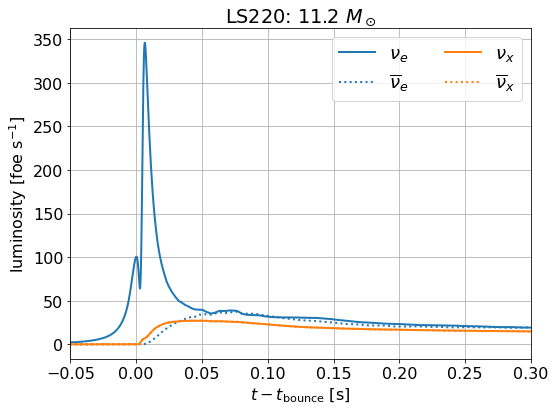

In [6]:
fig = plot_luminosity(model)

## LS220 EOS: 27.0 $M_\odot$

In [7]:
ifile = '../../models/Bollig_2016/s27.0c'
model = Bollig_2016(ifile, 'LS220')

In [8]:
model

**Bollig_2016 Model**

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $27$ $\mathrm{M_{\odot}}$|
|EOS | LS220 |

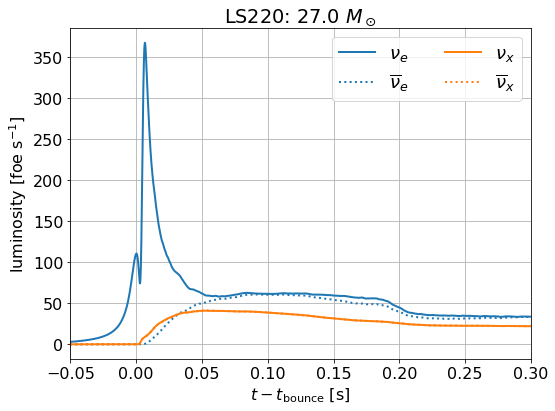

In [9]:
fig = plot_luminosity(model)

## Initial and Oscillated Spectra

Plot the neutrino spectra at the source and after the requested flavor transformation has been applied.

### Adiabatic MSW Flavor Transformation: Normal mass ordering

In [10]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = AdiabaticMSW()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 50*u.ms

ispec = model.get_initial_spectra(t, E)
ospec_nmo = model.get_transformed_spectra(t, E, xform_nmo)

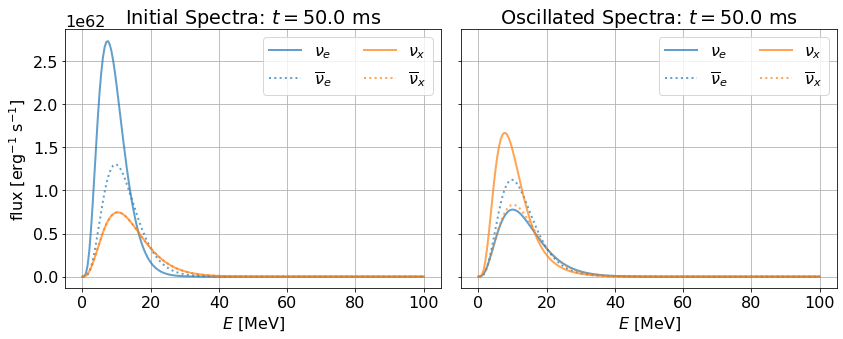

In [11]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [{}]'.format(E.unit),
           title='Initial Spectra: $t = ${:.1f}'.format(t) if i==0 else 'Oscillated Spectra: $t = ${:.1f}'.format(t))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();